In [2]:
#sklearn
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
#Rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem as Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import PandasTools
#matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
%matplotlib ipympl
#others
import random
import pandas as pd
from pandas import DataFrame
import numpy as np
import mglearn 
import os
import math
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from rdkit import Chem
from mordred import Calculator, descriptors
import csv
from sklearn.decomposition import PCA

In [3]:
from numpy import array

In [4]:
#descriptors results
def Desc_results(Method,Model_data):
    Model_data_AR= []
    Model=["Model 1","Model 2","Model 3","Model 4"]
    for i in Model:
        M=Model_data.xs(i, level='Model',axis= 1)
        Accuracy_test=np.array(M.loc[M.index == "Accuracy_test"])
        Roc_auc=np.array(M.loc[M.index == "Roc_auc"])
        Model_AR=(Accuracy_test[0],Roc_auc[0])
        Model_AR=[y for x in Model_AR for y in x]
        Model_AR= np.append(Model_AR,i)
        Model_data_AR.append(Model_AR)
        Model_data_last=pd.DataFrame(Model_data_AR)
        Model_data_last.columns=['Accuracy_mean','Accuracy_se','Roc_mean','Roc_se','Model']   
    Model_data_last['Method']=Method
    return Model_data_last


In [5]:
#Setting the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("C:/Users/A/Desktop/Paper_0_Hydrogel")

In [6]:
LR_model_data=pd.read_csv('./Results/LR_model_data.csv',encoding='utf-8',header=[0,1,2],index_col=0)
RF_model_data=pd.read_csv('./Results/RF_model_data.csv',encoding='utf-8',header=[0,1,2],index_col=0)
DT_model_data=pd.read_csv('./Results/DT_model_data.csv',encoding='utf-8',header=[0,1,2],index_col=0)
XGB_model_data=pd.read_csv('./Results/XGB_model_data.csv',encoding='utf-8',header=[0,1,2],index_col=0)

In [7]:
LR_data=Desc_results("LogisticRegression",LR_model_data)
RF_data=Desc_results("RandomForest",RF_model_data)
DT_data=Desc_results("DecisionTree",DT_model_data)
XGB_data=Desc_results("XGBoost",XGB_model_data)

In [8]:
Model_data_desc=pd.concat([LR_data,RF_data,DT_data,XGB_data],axis=0)
Model_data_desc

,Accuracy_mean,Accuracy_se,Roc_mean,Roc_se,Model,Method
0,0.6480952380952381,0.0159859632305395,0.6704166666666667,0.0185205094385766,Model 1,LogisticRegression
1,0.6829523809523811,0.0152149168957679,0.8027721088435373,0.0158155236702818,Model 2,LogisticRegression
2,0.7026666666666667,0.0117349102218053,0.8065561224489798,0.0168480933821358,Model 3,LogisticRegression
3,0.7098095238095239,0.012400285272119,0.8405272108843538,0.0159974116672758,Model 4,LogisticRegression
0,0.6251428571428571,0.0143364432633124,0.7226913265306123,0.0179492595013393,Model 1,RandomForest
1,0.6686666666666667,0.0139932539626273,0.7512670068027212,0.0160589373946061,Model 2,RandomForest
2,0.6717142857142856,0.0133104633793925,0.7373129251700681,0.0163325687264899,Model 3,RandomForest
3,0.6744761904761905,0.013051970077444,0.7454336734693879,0.0152925963477194,Model 4,RandomForest
0,0.6535238095238094,0.0149068521278911,0.6541241496598639,0.0156396496412783,Model 1,DecisionTree
1,0.6371428571428571,0.0144956010216752,0.6368069727891157,0.014151996586083,Model 2,DecisionTree


In [242]:
#fingerprints results
def FP_results(Model,Model_data):
    Model_data_AR= []
    Method=["LogisticRegression","DecisionTree","RandomForest","XGBoost"]
    for i in Method:
        M=Model_data.xs(i, level='Models',axis= 1)
        Accuracy_test=np.array(M.loc[M.index == "Accuracy_test"])
        Roc_auc=np.array(M.loc[M.index == "Roc_auc"])
        Model_AR=(Accuracy_test[0],Roc_auc[0])
        Model_AR=[y for x in Model_AR for y in x]
        Model_AR= np.append(Model_AR,i)
        Model_data_AR.append(Model_AR)
        Model_data_last=pd.DataFrame(Model_data_AR)
        Model_data_last.columns=['Accuracy_mean','Accuracy_se','Roc_mean','Roc_se','Method']   
    Model_data_last['Model']=Model
    return Model_data_last

In [295]:
Model_ECFP4=pd.read_csv('./Results/Model_ECFP4_data.csv',encoding='utf-8',header=[0,1,2],index_col=0)
Model_ECFP6=pd.read_csv('./Results/Model_ECFP6_data.csv',encoding='utf-8',header=[0,1,2],index_col=0)
Model_AtomPair=pd.read_csv("./Results/Model_AtomPair_data.csv",encoding='utf-8',header=[0,1,2],index_col=0)
Model_Torsion=pd.read_csv("./Results/Model_Torsion_data.csv",encoding='utf-8',header=[0,1,2],index_col=0)

In [298]:
ECFP4_data=FP_results("ECFP4",Model_ECFP4)
ECFP6_data=FP_results("ECFP6",Model_ECFP6)
AtomPair_data=FP_results("AtomPair",Model_AtomPair)
Torsion_data=FP_results("Torsion",Model_Torsion)

In [299]:
Model_data_FP=pd.concat([ECFP4_data,ECFP6_data,AtomPair_data,Torsion_data],axis=0)
Model_data_FP

,Accuracy_mean,Accuracy_se,Roc_mean,Roc_se,Method,Model
0,0.6565714285714286,0.0124915499783524,0.7445238095238095,0.0166508384423006,LogisticRegression,ECFP4
1,0.6535238095238095,0.0145807999743209,0.6705782312925169,0.0155175076416233,DecisionTree,ECFP4
2,0.6362857142857142,0.0142169073118853,0.7193835034013606,0.0161939420385911,RandomForest,ECFP4
3,0.6109523809523809,0.0136899585823476,0.6749447278911563,0.0151512685923808,XGBoost,ECFP4
0,0.6591428571428571,0.0135299047297261,0.740374149659864,0.0165750772407285,LogisticRegression,ECFP6
1,0.6222857142857143,0.0172633017497113,0.6337457482993196,0.0177502133475669,DecisionTree,ECFP6
2,0.6450476190476191,0.0141589358658271,0.7194132653061223,0.0174930980337016,RandomForest,ECFP6
3,0.6011428571428571,0.0123901504294499,0.676424319727891,0.0149062688561129,XGBoost,ECFP6
0,0.7142857142857142,0.0147216039745255,0.7772448979591837,0.0150709282134682,LogisticRegression,AtomPair
1,0.6854285714285715,0.0142140488135319,0.6804166666666667,0.0143268843610834,DecisionTree,AtomPair


In [505]:
import pandas as pd
df=pd.concat([Model_data_desc, Model_data_FP], axis=0)
df['Accuracy_mean']=round(df['Accuracy_mean'].fillna(0).apply(pd.to_numeric), 4)
df['Accuracy_se']=round(df['Accuracy_se'].fillna(0).apply(pd.to_numeric), 4)
df['Roc_mean']=round(df['Roc_mean'].fillna(0).apply(pd.to_numeric), 4)
df['Roc_se']=round(df['Roc_se'].fillna(0).apply(pd.to_numeric), 4)
df

,Accuracy_mean,Accuracy_se,Roc_mean,Roc_se,Model,Method
0,0.6481,0.0160,0.6704,0.0185,Model 1,LogisticRegression
1,0.6830,0.0152,0.8028,0.0158,Model 2,LogisticRegression
2,0.7027,0.0117,0.8066,0.0168,Model 3,LogisticRegression
3,0.7098,0.0124,0.8405,0.0160,Model 4,LogisticRegression
0,0.6251,0.0143,0.7227,0.0179,Model 1,RandomForest
1,0.6687,0.0140,0.7513,0.0161,Model 2,RandomForest
2,0.6717,0.0133,0.7373,0.0163,Model 3,RandomForest
3,0.6745,0.0131,0.7454,0.0153,Model 4,RandomForest
0,0.6535,0.0149,0.6541,0.0156,Model 1,DecisionTree
1,0.6371,0.0145,0.6368,0.0142,Model 2,DecisionTree


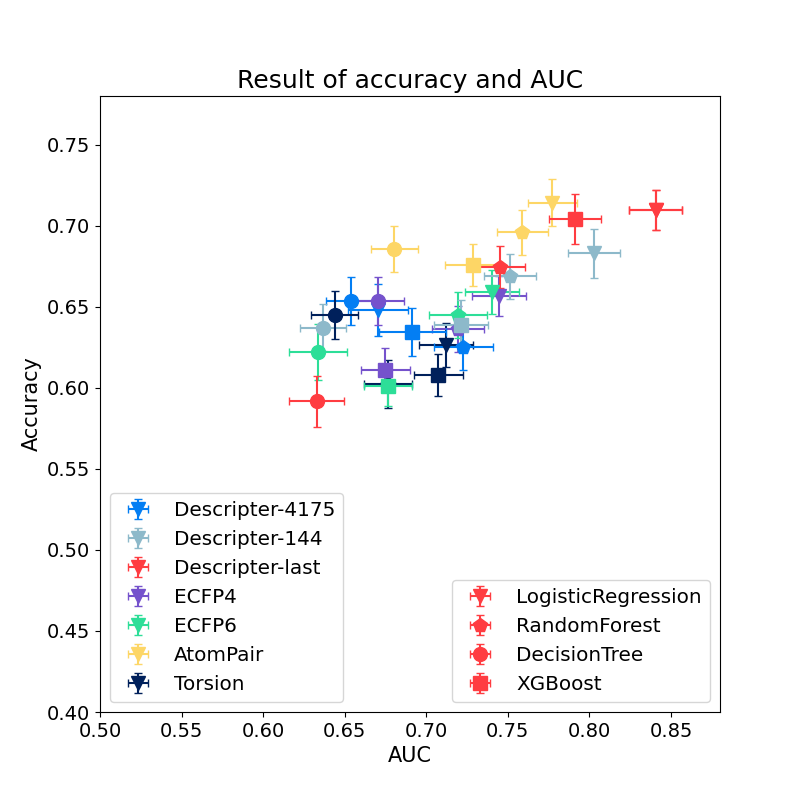

In [509]:
%matplotlib ipympl
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[0.5, 0.88], ylim=[0.4, 0.78])
plt.xlabel('AUC',fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.title('Result of accuracy and AUC',fontsize = 18)
plt.tick_params(labelsize=14) 
plt.rcParams['figure.figsize'] = (8.0, 8.0) 
dfa=df.loc[df["Method"] == "LogisticRegression"]
df11=dfa.loc[dfa["Model"] == "Model 1"]
df12=dfa.loc[dfa["Model"] == "Model 2"]
df13=dfa.loc[dfa["Model"] == "Model 4"]
df14=dfa.loc[dfa["Model"] == "ECFP4"]
df15=dfa.loc[dfa["Model"] == "ECFP6"]
df16=dfa.loc[dfa["Model"] == "AtomPair"]
df17=dfa.loc[dfa["Model"] == "Torsion"]

dfb=df.loc[df["Method"] == "RandomForest"]
df21=dfb.loc[dfb["Model"] == "Model 1"]
df22=dfb.loc[dfb["Model"] == "Model 2"]
df23=dfb.loc[dfb["Model"] == "Model 4"]
df24=dfb.loc[dfb["Model"] == "ECFP4"]
df25=dfb.loc[dfb["Model"] == "ECFP6"]
df26=dfb.loc[dfb["Model"] == "AtomPair"]
df27=dfb.loc[dfb["Model"] == "Torsion"]

dfc=df.loc[df["Method"] == "DecisionTree"]
df31=dfc.loc[dfc["Model"] == "Model 1"]
df32=dfc.loc[dfc["Model"] == "Model 2"]
df33=dfc.loc[dfc["Model"] == "Model 4"]
df34=dfc.loc[dfc["Model"] == "ECFP4"]
df35=dfc.loc[dfc["Model"] == "ECFP6"]
df36=dfc.loc[dfc["Model"] == "AtomPair"]
df37=dfc.loc[dfc["Model"] == "Torsion"]

dfd=df.loc[df["Method"] == "XGBoost"]
df41=dfd.loc[dfd["Model"] == "Model 1"]
df42=dfd.loc[dfd["Model"] == "Model 2"]
df43=dfd.loc[dfd["Model"] == "Model 4"]
df44=dfd.loc[dfd["Model"] == "ECFP4"]
df45=dfd.loc[dfd["Model"] == "ECFP6"]
df46=dfd.loc[dfd["Model"] == "AtomPair"]
df47=dfd.loc[dfd["Model"] == "Torsion"]

LogisticRegression
pe11=plt.errorbar(y=df11['Accuracy_mean'], yerr=df11['Accuracy_se'],x=df11['Roc_mean'], xerr=df11['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#037ef3", mec="#037ef3", ecolor='#037ef3')
pe12=plt.errorbar(y=df12['Accuracy_mean'], yerr=df12['Accuracy_se'],x=df12['Roc_mean'], xerr=df12['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#8db9ca", mec="#8db9ca", ecolor='#8db9ca')
pe14=plt.errorbar(y=df14['Accuracy_mean'], yerr=df14['Accuracy_se'],x=df14['Roc_mean'], xerr=df14['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#7552cc", mec="#7552cc", ecolor='#7552cc')
pe15=plt.errorbar(y=df15['Accuracy_mean'], yerr=df15['Accuracy_se'],x=df15['Roc_mean'], xerr=df15['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#2dde98", mec="#2dde98", ecolor='#2dde98')
pe16=plt.errorbar(y=df16['Accuracy_mean'], yerr=df16['Accuracy_se'],x=df16['Roc_mean'], xerr=df16['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#fdd666", mec="#fdd666", ecolor='#fdd666')
pe17=plt.errorbar(y=df17['Accuracy_mean'], yerr=df17['Accuracy_se'],x=df17['Roc_mean'], xerr=df17['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#00205b", mec="#00205b", ecolor='#00205b')
#RandomForest
pe21=plt.errorbar(y=df21['Accuracy_mean'], yerr=df21['Accuracy_se'],x=df21['Roc_mean'], xerr=df21['Roc_se'],fmt='p', alpha=1,
             capsize=3, markersize=10, mfc="#037ef3", mec="#037ef3", ecolor='#037ef3')
pe22=plt.errorbar(y=df22['Accuracy_mean'], yerr=df22['Accuracy_se'],x=df22['Roc_mean'], xerr=df22['Roc_se'],fmt='p', alpha=1,
             capsize=3, markersize=10, mfc="#8db9ca", mec="#8db9ca", ecolor='#8db9ca')
pe24=plt.errorbar(y=df24['Accuracy_mean'], yerr=df24['Accuracy_se'],x=df24['Roc_mean'], xerr=df24['Roc_se'],fmt='p', alpha=1,
             capsize=3, markersize=10, mfc="#7552cc", mec="#7552cc", ecolor='#7552cc')
pe25=plt.errorbar(y=df25['Accuracy_mean'], yerr=df25['Accuracy_se'],x=df25['Roc_mean'], xerr=df25['Roc_se'],fmt='p', alpha=1,
             capsize=3, markersize=10, mfc="#2dde98", mec="#2dde98", ecolor='#2dde98')
pe26=plt.errorbar(y=df26['Accuracy_mean'], yerr=df26['Accuracy_se'],x=df26['Roc_mean'], xerr=df26['Roc_se'],fmt='p', alpha=1,
             capsize=3, markersize=10, mfc="#fdd666", mec="#fdd666", ecolor='#fdd666')
pe27=plt.errorbar(y=df27['Accuracy_mean'], yerr=df27['Accuracy_se'],x=df27['Roc_mean'], xerr=df27['Roc_se'],fmt='p', alpha=1,
             capsize=3, markersize=10, mfc="#00205b", mec="#00205b", ecolor='#00205b')
#DecisionTree
pe31=plt.errorbar(y=df31['Accuracy_mean'], yerr=df31['Accuracy_se'],x=df31['Roc_mean'], xerr=df31['Roc_se'],fmt='o', alpha=1,
             capsize=3, markersize=10, mfc="#037ef3", mec="#037ef3", ecolor='#037ef3')
pe32=plt.errorbar(y=df32['Accuracy_mean'], yerr=df32['Accuracy_se'],x=df32['Roc_mean'], xerr=df32['Roc_se'],fmt='o', alpha=1,
             capsize=3, markersize=10, mfc="#8db9ca", mec="#8db9ca", ecolor='#8db9ca')
pe34=plt.errorbar(y=df34['Accuracy_mean'], yerr=df34['Accuracy_se'],x=df34['Roc_mean'], xerr=df34['Roc_se'],fmt='o', alpha=1,
             capsize=3, markersize=10, mfc="#7552cc", mec="#7552cc", ecolor='#7552cc')
pe35=plt.errorbar(y=df35['Accuracy_mean'], yerr=df35['Accuracy_se'],x=df35['Roc_mean'], xerr=df35['Roc_se'],fmt='o', alpha=1,
            capsize=3, markersize=10, mfc="#2dde98", mec="#2dde98", ecolor='#2dde98')
pe36=plt.errorbar(y=df36['Accuracy_mean'], yerr=df36['Accuracy_se'],x=df36['Roc_mean'], xerr=df36['Roc_se'],fmt='o', alpha=1,
             capsize=3, markersize=10, mfc="#fdd666", mec="#fdd666", ecolor='#fdd666')
pe37=plt.errorbar(y=df37['Accuracy_mean'], yerr=df37['Accuracy_se'],x=df37['Roc_mean'], xerr=df37['Roc_se'],fmt='o', alpha=1,
             capsize=3, markersize=10, mfc="#00205b", mec="#00205b", ecolor='#00205b')
#XGBoost
pe41=plt.errorbar(y=df41['Accuracy_mean'], yerr=df41['Accuracy_se'],x=df41['Roc_mean'], xerr=df41['Roc_se'],fmt='s', alpha=1,
             capsize=3, markersize=10, mfc="#037ef3", mec="#037ef3", ecolor='#037ef3')
pe42=plt.errorbar(y=df42['Accuracy_mean'], yerr=df42['Accuracy_se'],x=df42['Roc_mean'], xerr=df42['Roc_se'],fmt='s', alpha=1,
             capsize=3, markersize=10, mfc="#8db9ca", mec="#8db9ca", ecolor='#8db9ca')
pe44=plt.errorbar(y=df44['Accuracy_mean'], yerr=df44['Accuracy_se'],x=df44['Roc_mean'], xerr=df44['Roc_se'],fmt='s', alpha=1,
             capsize=3, markersize=10, mfc="#7552cc", mec="#7552cc", ecolor='#7552cc')
pe45=plt.errorbar(y=df45['Accuracy_mean'], yerr=df45['Accuracy_se'],x=df45['Roc_mean'], xerr=df45['Roc_se'],fmt='s', alpha=1,
             capsize=3, markersize=10, mfc="#2dde98", mec="#2dde98", ecolor='#2dde98')
pe46=plt.errorbar(y=df46['Accuracy_mean'], yerr=df46['Accuracy_se'],x=df46['Roc_mean'], xerr=df46['Roc_se'],fmt='s', alpha=1,
             capsize=3, markersize=10, mfc="#fdd666", mec="#fdd666", ecolor='#fdd666')
pe47=plt.errorbar(y=df47['Accuracy_mean'], yerr=df47['Accuracy_se'],x=df47['Roc_mean'], xerr=df47['Roc_se'],fmt='s', alpha=1,
             capsize=3, markersize=10, mfc="#00205b", mec="#00205b", ecolor='#00205b')

#Descripter-last
pe13_1=plt.errorbar(y=df13['Accuracy_mean'], yerr=df13['Accuracy_se'],x=df13['Roc_mean'], xerr=df13['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#ff3c41", mec="#ff3c41", ecolor='#ff3c41',label="Descripter-16")
pe13_2=plt.errorbar(y=df13['Accuracy_mean'], yerr=df13['Accuracy_se'],x=df13['Roc_mean'], xerr=df13['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#ff3c41", mec="#ff3c41", ecolor='#ff3c41',label="Logistic")
pe23=plt.errorbar(y=df23['Accuracy_mean'], yerr=df23['Accuracy_se'],x=df23['Roc_mean'], xerr=df23['Roc_se'],fmt='p', alpha=1,
             capsize=3, markersize=10, mfc="#ff3c41", mec="#ff3c41", ecolor='#ff3c41',label="KNeighbors")
pe33=plt.errorbar(y=df33['Accuracy_mean'], yerr=df33['Accuracy_se'],x=df33['Roc_mean'], xerr=df33['Roc_se'],fmt='o', alpha=1,
             capsize=3, markersize=10, mfc="#ff3c41", mec="#ff3c41", ecolor='#ff3c41',label="RandomForest")
pe43=plt.errorbar(y=df43['Accuracy_mean'], yerr=df43['Accuracy_se'],x=df43['Roc_mean'], xerr=df43['Roc_se'],fmt='s', alpha=1,
             capsize=3, markersize=10, mfc="#ff3c41", mec="#ff3c41", ecolor='#ff3c41',label="GradientBoosting")
handles1=[pe11,pe12,pe13_1,pe14,pe15,pe16,pe17]
labels1=["Descripter-4175","Descripter-144","Descripter-last","ECFP4","ECFP6","AtomPair","Torsion"]
handles2=[pe13_2,pe23,pe33,pe43]
labels2=["LogisticRegression","RandomForest","DecisionTree","XGBoost"]
l1=plt.legend(handles1, labels1,loc="lower left",fontsize='x-large')
l2=plt.legend(handles2, labels2,loc="lower right",fontsize='x-large')
plt.gca().add_artist(l1)
plt.savefig("./original figure/Figure_2A.svg", dpi=600,format="svg")
plt.show()

In [387]:
LR_model_data

Method         LogisticRegression                                          \
Model                     Model 1             Model 2             Model 3   
Values                       Mean        Se      Mean        Se      Mean   
Accuracy_test            0.648095  0.015986  0.682952  0.015215  0.702667   
Accuracy_train           0.963346  0.003934  0.857093  0.003845  0.731316   
F1 Score                 0.668427  0.018017  0.707642  0.015002  0.777069   
Precision                0.673742  0.017943  0.706392  0.017167  0.655992   
Recall                   0.687857  0.025052  0.733214  0.022613  0.962857   
Roc_auc                  0.670417  0.018521  0.802772  0.015816  0.806556   

Method                                        
Model                      Model 4            
Values                Se      Mean        Se  
Accuracy_test   0.011735  0.709810  0.012400  
Accuracy_train  0.003572  0.746103  0.003818  
F1 Score        0.008116  0.779298  0.008767  
Precision       0.010239  0.664975  0.011021  
Recall          0.009818  0.950714  0.010234  
Roc_auc         0.016848  0.840527  0.015997

In [390]:
#descriptors results
def M4_results(Method,Model_data):
    M=Model_data.xs("Model 4", level='Model',axis= 1)
    Accuracy_test=np.array(M.loc[M.index == "Accuracy_test"])
    Roc_auc=np.array(M.loc[M.index == "Roc_auc"])
    Precision=np.array(M.loc[M.index == "Precision"])
    Recall=np.array(M.loc[M.index == "Recall"])
    F1_Score=np.array(M.loc[M.index == "F1 Score"])
    Model_AR=(Accuracy_test[0],F1_Score[0],Precision[0],Recall[0],Roc_auc[0])
    Model_data_last=pd.DataFrame(Model_AR)
    Model_data_last.columns=['Mean','Se']  
    Model_data_last['Label']=['Accuracy','F1 Score','Precision','Recall','AUC']
    Model_data_last['Method']=Method
    return Model_data_last


In [392]:
LR_M4=M4_results("LogisticRegression",LR_model_data)
RF_M4=M4_results("RandomForest",RF_model_data)
DT_M4=M4_results("DecisionTree",DT_model_data)
XGB_M4=M4_results("XGBoost",XGB_model_data)
Model_data_M4=pd.concat([LR_M4,RF_M4,DT_M4,XGB_M4],axis=0)
Model_data_M4["X"]=[1,1.5,2,2.5,3,
                    6,6.5,7,7.5,8,
                    11,11.5,12,12.5,13,
                    16,16.5,17,17.5,18]
df=Model_data_M4
df

,Mean,Se,Label,Method,X
0,0.709810,0.012400,Accuracy,LogisticRegression,1.0
1,0.779298,0.008767,F1 Score,LogisticRegression,1.5
2,0.664975,0.011021,Precision,LogisticRegression,2.0
3,0.950714,0.010234,Recall,LogisticRegression,2.5
4,0.840527,0.015997,AUC,LogisticRegression,3.0
0,0.674476,0.013052,Accuracy,RandomForest,6.0
1,0.707687,0.012173,F1 Score,RandomForest,6.5
2,0.691728,0.014907,Precision,RandomForest,7.0
3,0.751071,0.021053,Recall,RandomForest,7.5
4,0.745434,0.015293,AUC,RandomForest,8.0


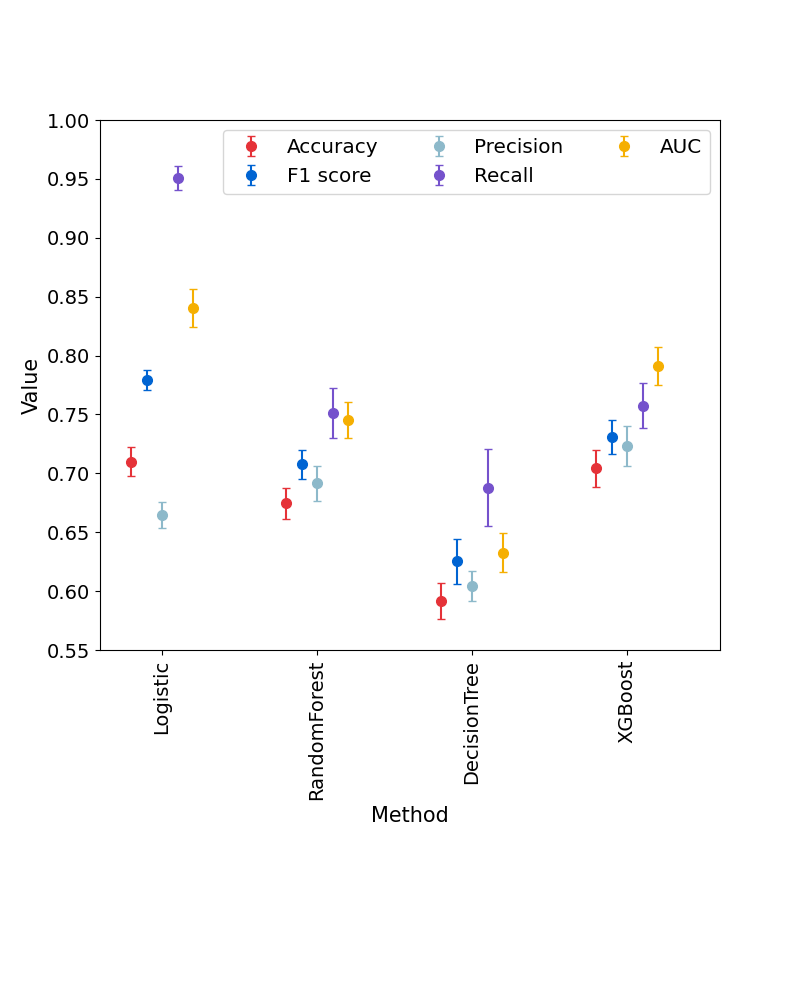

In [415]:
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (8, 10) 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[0,20], ylim=[0.55, 1])
plt.xlabel('Method',fontsize = 15)#设置x坐标标注，字体为18号
plt.ylabel('Value',fontsize = 15)#设置y坐标标注
plt.tick_params(labelsize=14) 
df1=df.loc[df["Label"] == "Accuracy"]
df2=df.loc[df["Label"] == "F1 Score"]
df3=df.loc[df["Label"] == "Precision"]
df4=df.loc[df["Label"] == "Recall"]
df5=df.loc[df["Label"] == "AUC"]

pe1=plt.errorbar(y=df1['Mean'], yerr=df1['Se'],x=df1['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#e53238", mec="#e53238", ecolor='#e53238',label="Accuracy")
pe2=plt.errorbar(y=df2['Mean'], yerr=df2['Se'],x=df2['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#0064d2", mec="#0064d2", ecolor='#0064d2',label="F1 score")
pe3=plt.errorbar(y=df3['Mean'], yerr=df3['Se'],x=df3['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#8db9ca", mec="#8db9ca", ecolor='#8db9ca',label="Precision")
pe4=plt.errorbar(y=df4['Mean'], yerr=df4['Se'],x=df4['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#7552cc", mec="#7552cc", ecolor='#7552cc',label="Recall")
pe5=plt.errorbar(y=df5['Mean'], yerr=df5['Se'],x=df5['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#f5af02", mec="#f5af02", ecolor='#f5af02',label="AUC")
labels=["Accuracy","F1 score","Precision","Recall","AUC"]
handles=[pe1,pe2,pe3,pe4,pe5]
l1=plt.legend(handles, labels,loc="upper right",fontsize='x-large',ncol=3)
xData = [2, 7, 12,17]
xLim= ["Logistic","RandomForest","DecisionTree","XGBoost"]
plt.xticks(xData,xLim)
plt.xticks(rotation=90)
plt.gcf().subplots_adjust(bottom=0.35)
plt.savefig("./original figure/Figure_2B.svg", dpi=600,format="svg")
plt.show()

In [425]:
import joblib
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
LogReg= joblib.load(filename='./Models/LogReg.pkl')
RF= joblib.load(filename='./Models/RF.pkl')
XGB= joblib.load(filename='./Models/XGB.pkl')
DT= joblib.load(filename='./Models/DT.pkl')
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)


In [426]:
X_LR=np.array(pd.read_csv("./Results/data_lr.csv",sep=',',header=0,index_col=0))
X_RF=np.array(pd.read_csv("./Results/data_rf.csv",sep=',',header=0,index_col=0))
X_DT=np.array(pd.read_csv("./Results/data_dt.csv",sep=',',header=0,index_col=0))
X_XGB=np.array(pd.read_csv("./Results/data_xgb.csv",sep=',',header=0,index_col=0))
Raw_data = pd.read_csv('./Original data/raw_data.csv',index_col=0)
Raw_data['Gelability']=np.where(Raw_data['Gelability']=='Gelable', 1, 0)
y=Raw_data['Gelability'].values

In [432]:
tprs1 = []
aucs1 = []
tprs2 = []
aucs2 = []
tprs3 = []
aucs3 = []
tprs4 = []
aucs4 = []
mean_fpr1 = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv.split(X_LR, y)):
    LogReg.fit(np.array(X_LR[train]), np.array(y[train]))
    viz1 = RocCurveDisplay.from_estimator(
        LogReg,
        X_LR[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=2,
        ax=ax,
    )
    interp_tpr1 = np.interp(mean_fpr1, viz1.fpr, viz1.tpr)
    interp_tpr1[0] = 0.0
    tprs1.append(interp_tpr1)
    aucs1.append(viz1.roc_auc)
    
mean_fpr2 = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv.split(X_RF, y)):
    RF.fit(np.array(X_RF[train]), np.array(y[train]))
    viz2 = RocCurveDisplay.from_estimator(
        RF,
        X_RF[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=2,
        ax=ax,
    )
    interp_tpr2 = np.interp(mean_fpr2, viz2.fpr, viz2.tpr)
    interp_tpr2[0] = 0.0
    tprs2.append(interp_tpr2)
    aucs2.append(viz2.roc_auc)
    
    mean_fpr3 = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv.split(X_DT, y)):
    XGB.fit(np.array(X_DT[train]), np.array(y[train]))
    viz3 = RocCurveDisplay.from_estimator(
        XGB,
        X_DT[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=2,
        ax=ax,
    )
    interp_tpr3 = np.interp(mean_fpr3, viz3.fpr, viz3.tpr)
    interp_tpr3[0] = 0.0
    tprs3.append(interp_tpr3)
    aucs3.append(viz3.roc_auc)
    
    mean_fpr4= np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv.split(X_XGB, y)):
    DT.fit(np.array(X_XGB[train]), np.array(y[train]))
    viz4 = RocCurveDisplay.from_estimator(
        DT,
        X_XGB[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=2,
        ax=ax,
    )
    interp_tpr4 = np.interp(mean_fpr4, viz4.fpr, viz4.tpr)
    interp_tpr4[0] = 0.0
    tprs4.append(interp_tpr4)
    aucs4.append(viz4.roc_auc)    


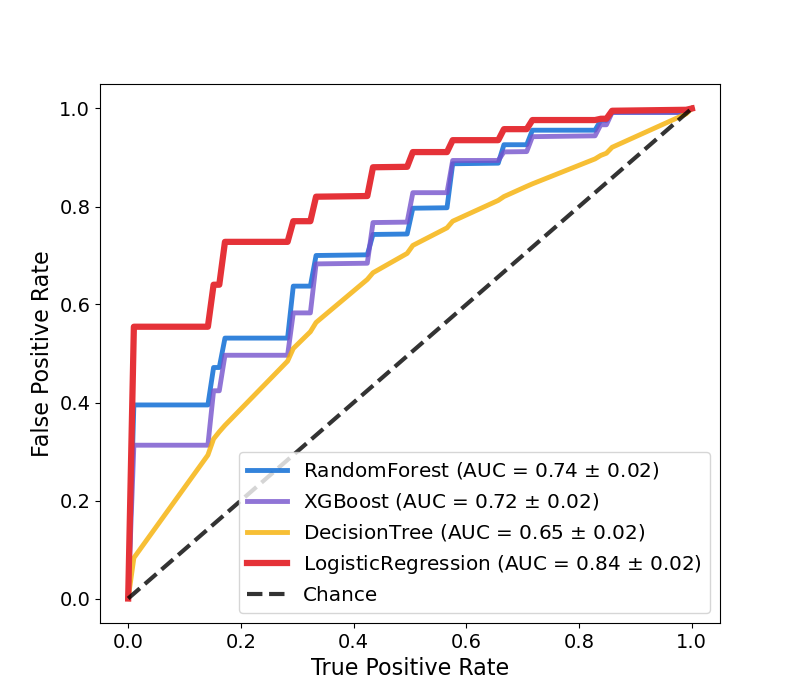

In [442]:
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (8, 7) 
fig, ax = plt.subplots()
plt.xlabel('True Positive Rate',fontsize = 16)
plt.ylabel('False Positive Rate',fontsize = 16)
plt.tick_params(labelsize=14) 

mean_tpr2 = np.mean(tprs2, axis=0)
mean_tpr2[-1] = 1.0
mean_auc2 = auc(mean_fpr2, mean_tpr2)
std_auc2 = np.std(aucs2)/math.sqrt(len(aucs2))
ax.plot(mean_fpr2, mean_tpr2,color="#0064d2",label=r"RandomForest (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc2, std_auc2),lw=3.5,alpha=0.8)

mean_tpr3 = np.mean(tprs3, axis=0)
mean_tpr3[-1] = 1.0
mean_auc3 = auc(mean_fpr3, mean_tpr3)
std_auc3 = np.std(aucs3)/math.sqrt(len(aucs3))
ax.plot(mean_fpr3, mean_tpr3,color="#7552cc",label=r"XGBoost (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc3, std_auc3),lw=3.5,alpha=0.8)

mean_tpr4 = np.mean(tprs4, axis=0)
mean_tpr4[-1] = 1.0
mean_auc4 = auc(mean_fpr4, mean_tpr4)
std_auc4 = np.std(aucs3)/math.sqrt(len(aucs4))
ax.plot(mean_fpr4, mean_tpr4,color="#f5af02",label=r"DecisionTree (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc4, std_auc4),lw=3.5,alpha=0.8)


mean_tpr1 = np.mean(tprs1, axis=0)
mean_tpr1[-1] = 1.0
mean_auc1 = auc(mean_fpr1, mean_tpr1)
std_auc1 = np.std(aucs1)/math.sqrt(len(aucs1))
ax.plot(mean_fpr1, mean_tpr1,color="#e53238",label=r"LogisticRegression (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc1, std_auc1),lw=4.5,alpha=1)

ax.plot([0, 1], [0, 1], linestyle="--", lw=3, color="black", label="Chance", alpha=0.8)
ax.legend(loc="lower right",fontsize='x-large')
plt.savefig("./original figure/Figure_2C.svg", dpi=600,format="svg")
plt.show()


In [448]:
df=pd.read_csv("./Results/test_score.csv",sep=',',header=0,index_col=0)
df.head()

,Mean,Se,X
0,0.678762,0.013977,5
1,0.683048,0.014358,6
2,0.681524,0.015693,7
3,0.678571,0.015039,8
4,0.687048,0.014835,9


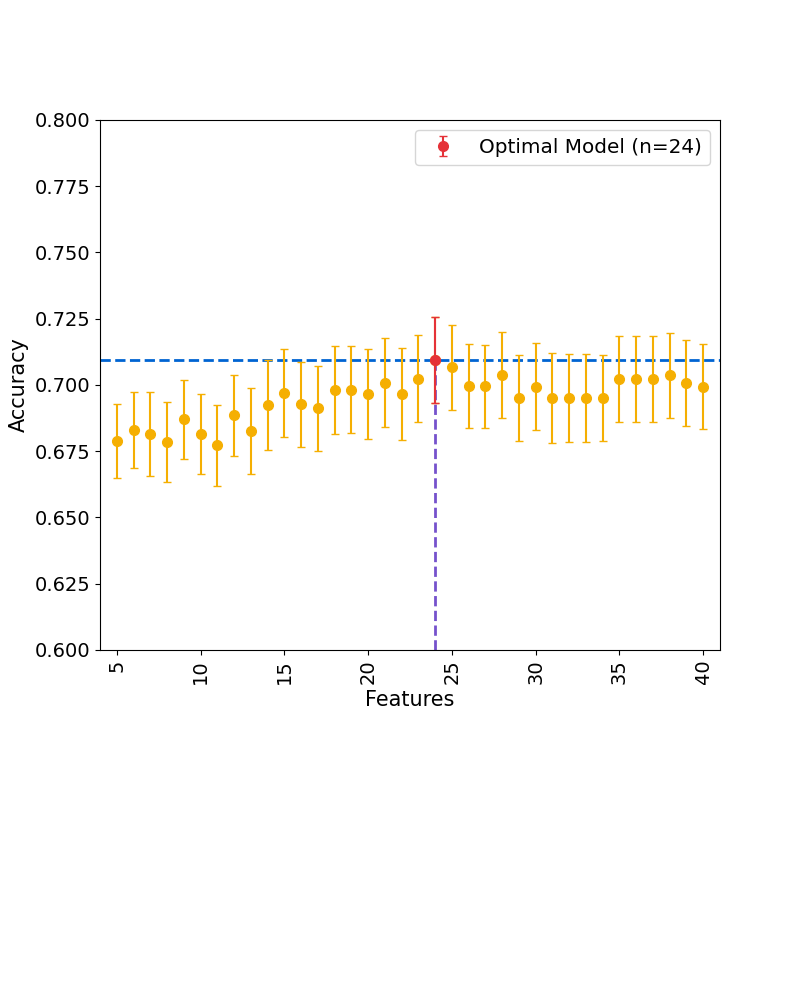

In [482]:
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (8, 10) 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[4,41], ylim=[0.6, 0.8])
plt.xlabel('Features',fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.tick_params(labelsize=14) 
df1=df.loc[df["X"] == 24]
plt.axhline(y=0.709429, 
            #xmin=0.2,
            #xmax=0.75,
            c="#0064d2",
            linestyle='--',
            linewidth=2,
            #marker='*',
            markerfacecolor='w',
            markersize=10,#marker大小
         )
plt.axvline(x=24, 
            #xmin=0.2,
            ymax=0.55,
            c="#7552cc",
            linestyle='--',
            linewidth=2,
            #marker='*',
            markerfacecolor='w',
            markersize=10,
         )
pe5=plt.errorbar(y=df['Mean'], yerr=df['Se'],x=df['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#f5af02", mec="#f5af02", ecolor='#f5af02',label="AUC")
pe1=plt.errorbar(y=df1['Mean'], yerr=df1['Se'],x=df1['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#e53238", mec="#e53238", ecolor='#e53238',label="Accuracy")
labels=["Optimal Model (n=24)"]
handles=[pe1]
l1=plt.legend(handles, labels,loc="upper right",fontsize='x-large',ncol=3)
plt.xticks(rotation=90)
plt.gcf().subplots_adjust(bottom=0.35)
plt.savefig("./original figure/Figure_2D.svg", dpi=600,format="svg")
plt.show()

In [515]:
Feature_importance=pd.read_csv('./Results/LR_feature_importance.csv',encoding='utf-8',header=[0,1],index_col=0)
Feature_importance.columns=['Mean','Std','Se']
Feature_importance['Descripter']=Feature_importance.index
Feature_importance['X']=range(1, len(Feature_importance["Mean"])+1)
Feature_importance.head()

,Mean,Std,Se,Descripter,X
CATS2D_09_DA,-0.015887,0.013983,0.004422,CATS2D_09_DA,1
GATS7s,-0.013592,0.010908,0.003449,GATS7s,2
SpMAD_EA(ri),-0.012169,0.010832,0.003425,SpMAD_EA(ri),3
GATS6i,-0.007761,0.009421,0.002979,GATS6i,4
VE1sign_B(p),-0.007521,0.009394,0.002971,VE1sign_B(p),5


In [520]:
Feature_importance['Colour']=np.where(Feature_importance['Mean']>0, 1, 0)

In [521]:
Feature_importance

,Mean,Std,Se,Descripter,X,Colour
CATS2D_09_DA,-0.015887,0.013983,0.004422,CATS2D_09_DA,1,0
GATS7s,-0.013592,0.010908,0.003449,GATS7s,2,0
SpMAD_EA(ri),-0.012169,0.010832,0.003425,SpMAD_EA(ri),3,0
GATS6i,-0.007761,0.009421,0.002979,GATS6i,4,0
VE1sign_B(p),-0.007521,0.009394,0.002971,VE1sign_B(p),5,0
SpDiam_AEA(ed),-0.005972,0.012441,0.003934,SpDiam_AEA(ed),6,0
SM10_AEA(dm),-0.005310,0.013098,0.004142,SM10_AEA(dm),7,0
VE3sign_D/Dt,-0.005155,0.015621,0.004940,VE3sign_D/Dt,8,0
MATS3p,-0.004211,0.009548,0.003019,MATS3p,9,0
F10[O-O],-0.001662,0.010177,0.003218,F10[O-O],10,0


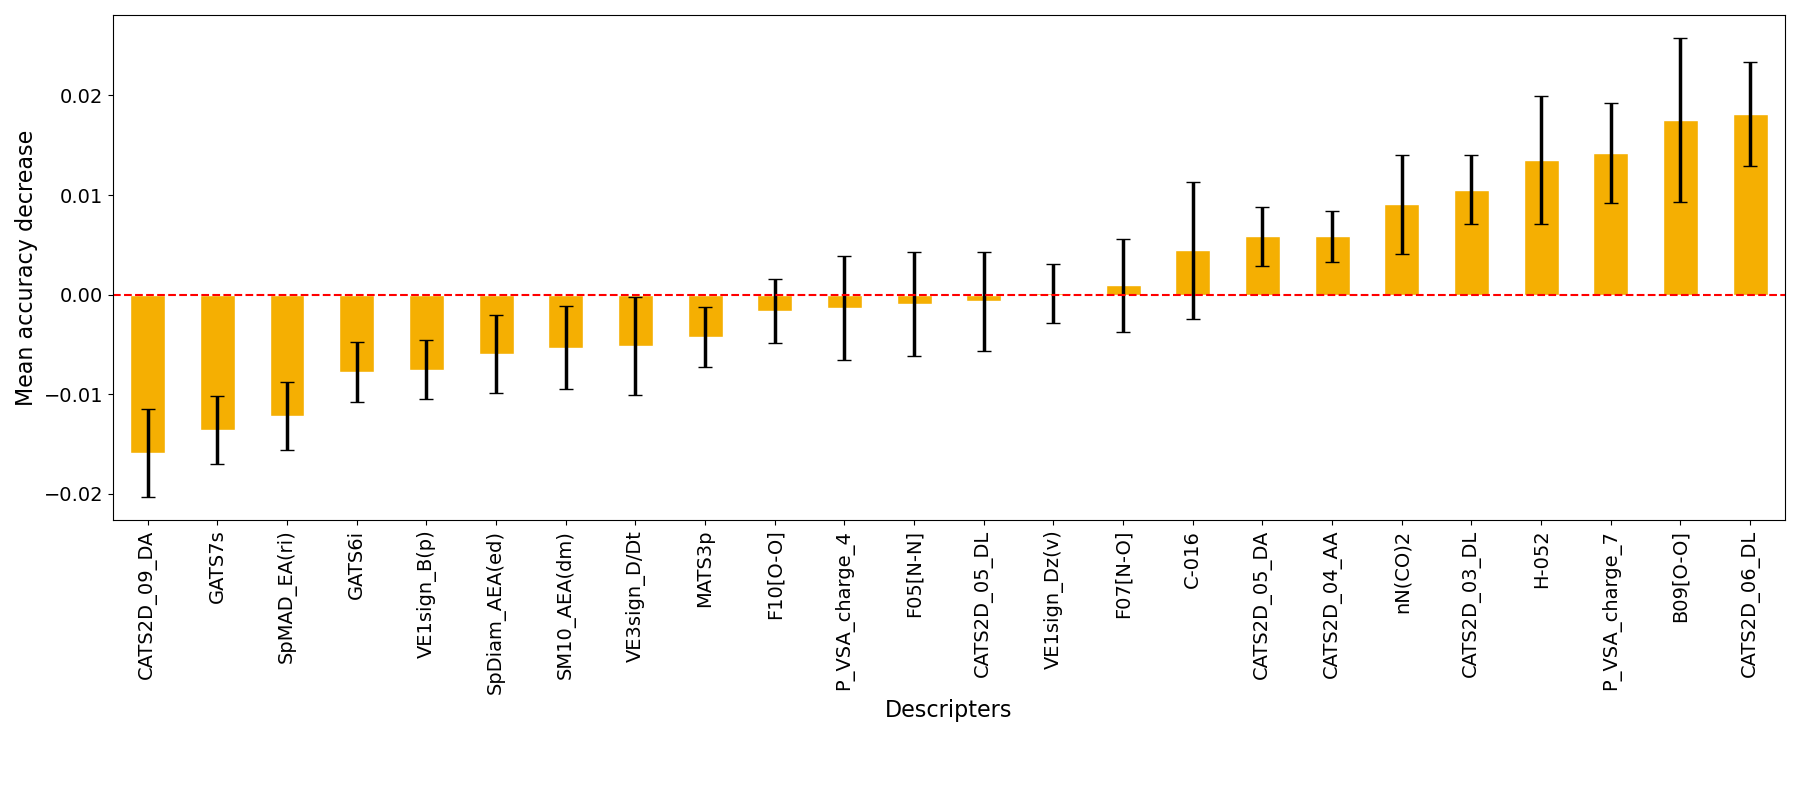

In [532]:
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (18, 8) 
fig, ax = plt.subplots()
plt.tick_params(labelsize=14) 
error_attri=dict(elinewidth=2.5,ecolor="black",capsize=5)
Feature_importance.plot.bar(x='Descripter',y='Mean',rot=0,yerr='Se',facecolor = '#f5af02', edgecolor = 'white',error_kw=error_attri,ax=ax)
ax.set_ylabel("Mean accuracy decrease",fontsize = 16)
plt.xticks(rotation=90)
plt.xlabel('Descripters',fontsize = 16)
fig.tight_layout()
plt.axhline(y=0,ls="--",c="red")
plt.gcf().subplots_adjust(bottom=0.35)
ax.get_legend().remove()
plt.savefig("./original figure/Figure_2E.svg", dpi=600,format="svg")
plt.show()


In [524]:
help(plot.bar)

NameError: name 'plot' is not defined